In [27]:
%matplotlib inline
%matplotlib notebook
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, sys, re
import pickle

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time, TimeDelta

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
import warnings
warnings.filterwarnings("ignore")
sys.path.insert(0, '/home/ivan/Study/Astro/solar')
import matplotlib.colors as colors

In [28]:
'''
To get stackplotX working properly in sunpy 5.0
replace the line
from sunpy.physics.solar_rotation import mapsequence_solar_derotate
with
from sunkit_image.coalignment import mapsequence_coalign_by_rotation
https://docs.sunpy.org/en/stable/whatsnew/4.0.html
Replace limits for the matplotlib slider in line 2026 in function plot_stackplot:
axframe2 = plt.axes([ax2_pos[0], 0.03, ax2_pos[2]-ax2_pos[0], 0.02], facecolor=axcolor)            
'''
import stackplotX as stp

Use predownloaded and calibrated lvl 1.5 AIA maps

In [29]:
ds_dir = '/media/ivan/TOSHIBA EXT/subs'
obs_data_path = '/media/ivan/TOSHIBA EXT/aia_img/maps_part/'

start_time = Time('2011-03-07T13:45:26', scale='utc', format='isot')
obs_lvl15_flare_data = '/media/ivan/TOSHIBA EXT/aia_img/2011_event/flare_roi/calibrated/time_interval/' #middle_interval/'#'

Load mapsequence from lvl_1.5 folder

In [30]:
mapsequence = sunpy.map.Map(obs_lvl15_flare_data + 'aia.lev1.5_euv_12s_roi.2011-03-07T*.fits', sequence=True)


Create a Stackplot object

In [31]:
st = stp.Stackplot(mapsequence)
binpix = 2 # resampling step
res_maps = []
st.mapseq_resample(binpix=binpix)

resampling mapseq.....


100%|██████████| 431/431 [00:35<00:00, 12.28it/s]


Define slit to infer brightness profile from (If not defined)
For mapseq_mkdiff set an argument: running difference (rdiff)

Use the mapseq_mkdiff method to create a difference map from your sequence. 
‘mode’ refers to the type of difference you wish to calculate: 
‘rratio’ for relative ratio, ‘rdiff’ for relative difference, ‘dtrend’ for detrend. 

‘dt’ represents the time difference (in seconds) between the current frame and the reference frame.

***

Use the plot_mapseq method to visualize the difference map sequence. Set ‘diff=True’ to indicate that a difference map is to be plotted. ‘norm’ refers to the color normalization option for the map. Note: you can interact with the pop-up window to modify the map. A left-click adds a new anchor point for the slit on the map, while a right-click removes the latest modification.

making the diff mapseq.....


100%|██████████| 431/431 [00:03<00:00, 133.18it/s]


[-500.26953503 -148.61506845  200.36583435  550.3228194 ]


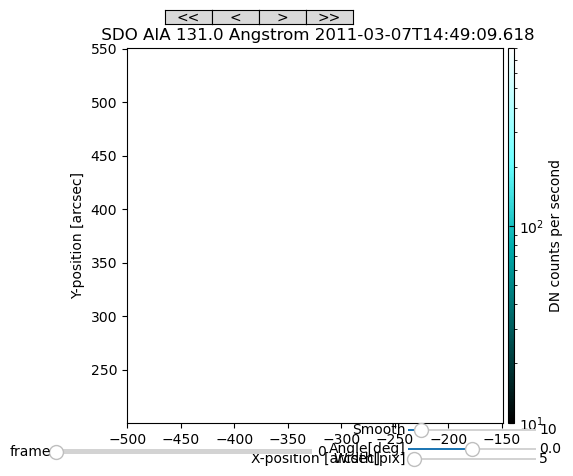

In [32]:
%matplotlib inline
slit_file = './td_slit_data_v1.pickle'
st.mapseq_mkdiff(mode='rdiff', dt=12.)
st.plot_mapseq(diff=True, norm=colors.LogNorm(vmin=1e1, vmax=8e2))
if os.path.isfile(slit_file):
    st.cutslit_fromfile(infile=slit_file)
else:
    print('no slit file found')
    st.cutslit_tofile(outfile='td_slit_data_v1.pickle')

Plot time-distance diagram

Use the plot_stackplot method to generate a stack plot from your difference map sequence. 'norm' refers to the color normalization option (should be the same as before), 'cmap' refers to your choice of color map, and 'uni_cm' ensures a uniform color map across the stack plot and the map.

making the stack plot...


100%|██████████| 431/431 [01:54<00:00,  3.78it/s]


[-500.26953503 -148.61506845  200.36583435  550.3228194 ]


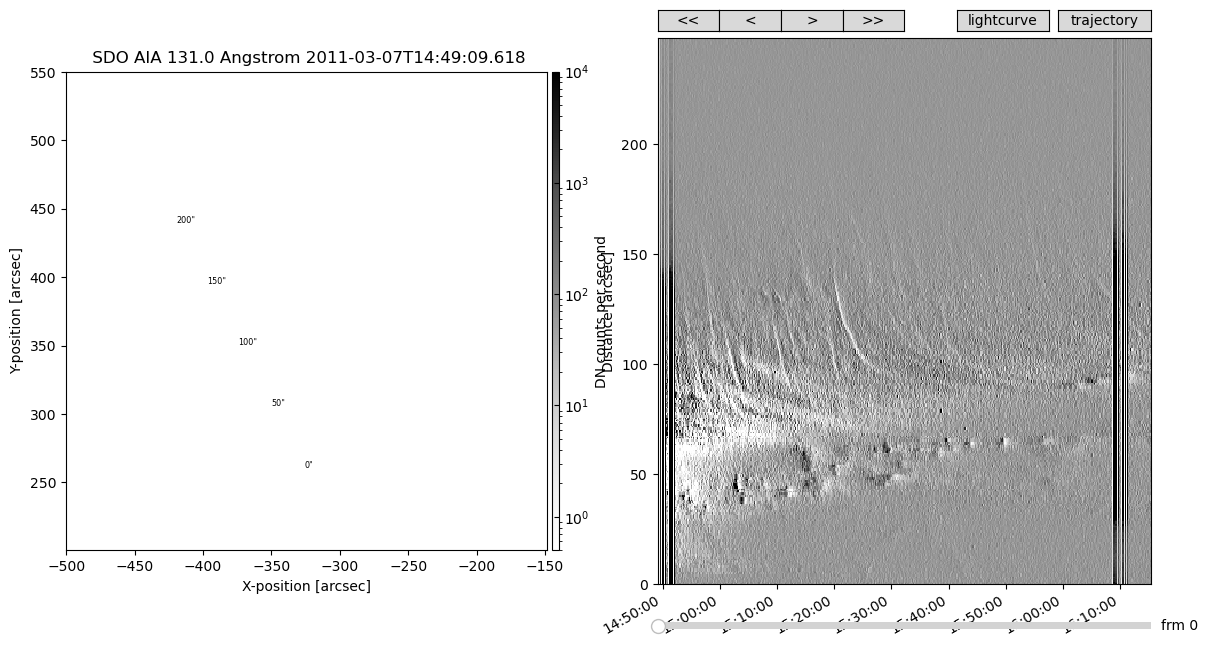

In [33]:
%matplotlib inline
st.plot_stackplot(norm=colors.Normalize(vmin=-74, vmax=74), cmap='Greys', uni_cm=False)